In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

wine_db = pd.read_csv('winequality-red.csv')
wine_db.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\doguk\AppData\Local\Temp\ipykernel_25332\1948074880.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'fixed acidity', y='quality', palette = 'Set2', data = wine_db)
C:\Users\doguk\AppData\Local\Temp\ipykernel_25332\1948074880.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'alcohol', y='quality', palette = 'Set3', data = wine_db)


<Axes: title={'center': 'Quality-Alcohol'}, xlabel='alcohol', ylabel='quality'>

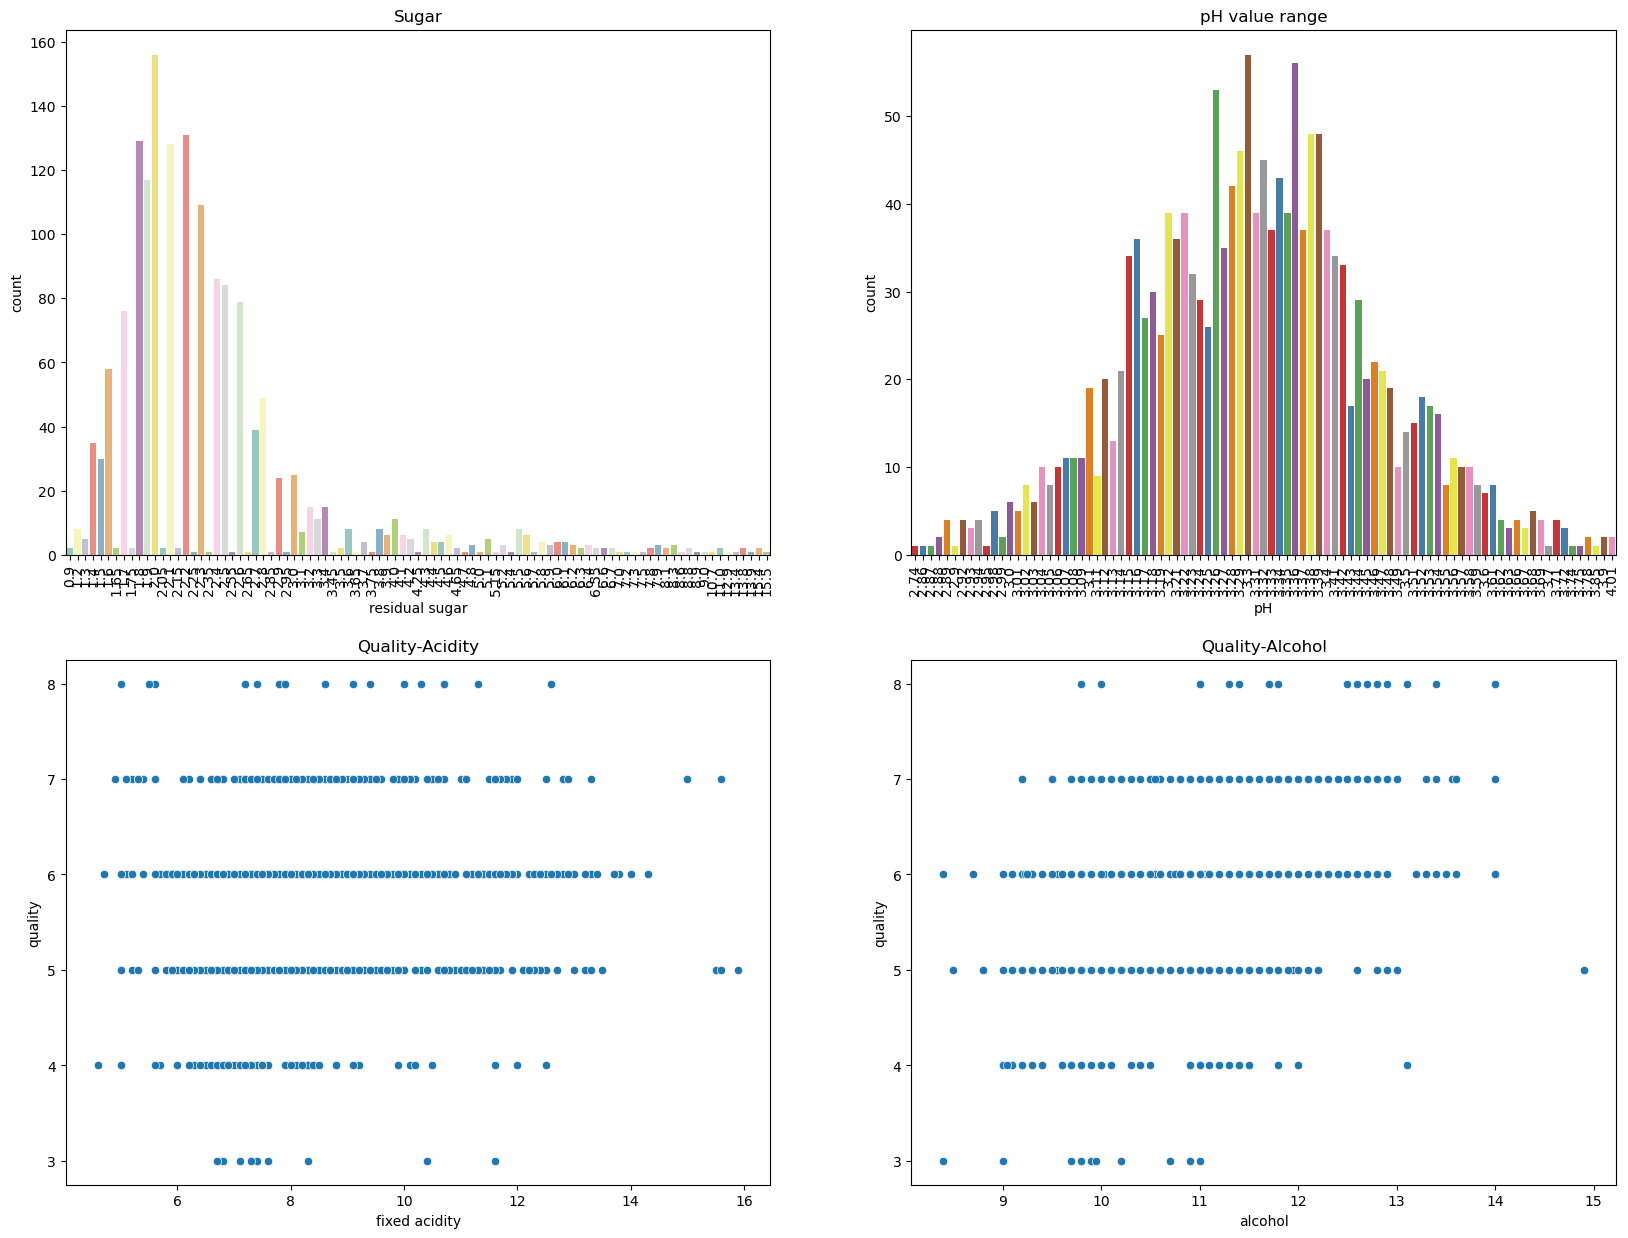

In [8]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
plt.gca().set_title('Sugar')
plt.xticks(rotation=90)
sns.countplot(x = 'residual sugar', palette = 'Set3', data = wine_db)

plt.subplot(2,2,2)
plt.gca().set_title('pH value range')
plt.xticks(rotation=90)
sns.countplot(x = 'pH', palette = 'Set1', data = wine_db)

plt.subplot(2,2,3)
plt.gca().set_title('Quality-Acidity')
sns.scatterplot(x = 'fixed acidity', y='quality', palette = 'Set2', data = wine_db)

plt.subplot(2,2,4)
plt.gca().set_title('Quality-Alcohol')
sns.scatterplot(x= 'alcohol', y='quality', palette = 'Set3', data = wine_db)

In [9]:
wine_db_temp = wine_db.copy()
wine_db_temp.columns = wine_db_temp.columns.str.replace(" ", "_")
wine_db_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

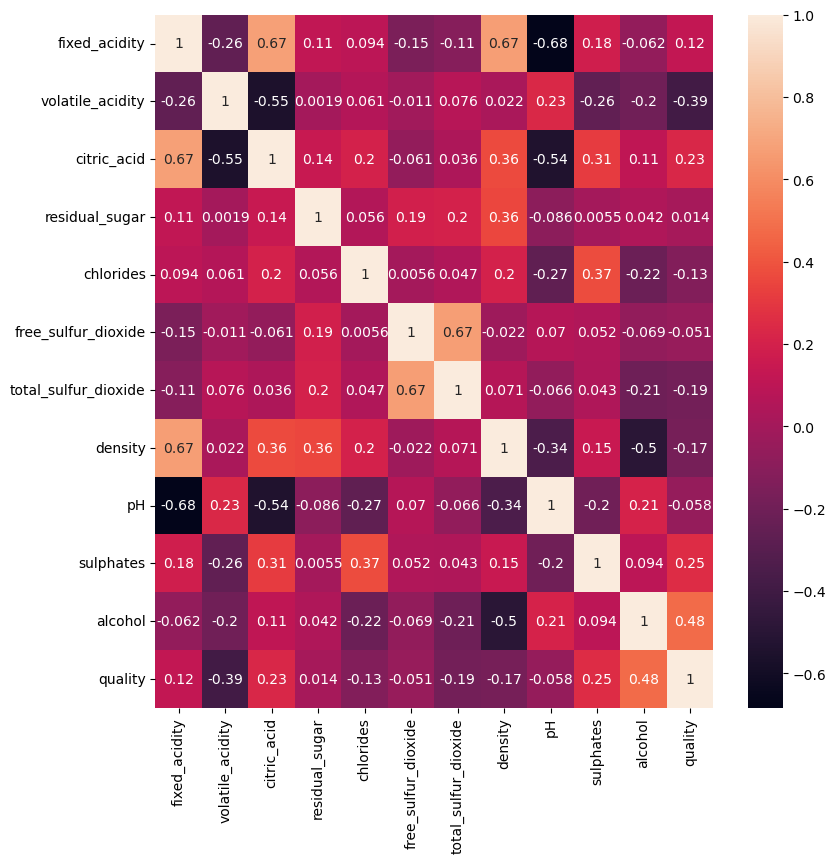

In [10]:
correlation = wine_db_temp.corr()
plt.figure(figsize = (9,9))
sns.heatmap(correlation, annot = True)

     Actual Value  Predicted Value
0               6         5.319303
1               5         4.814738
2               6         4.775500
3               5         5.195816
4               6         6.003065
..            ...              ...
315             6         5.983933
316             5         4.996066
317             5         5.072561
318             6         6.000881
319             4         4.888324

[320 rows x 2 columns]


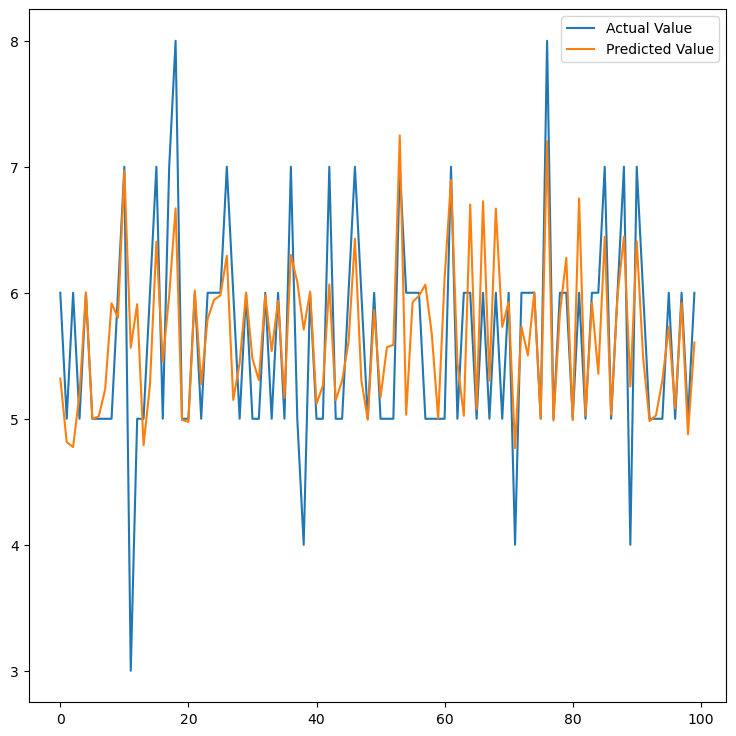

In [28]:
import math
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

YAxis = pd.DataFrame({'quality': wine_db['quality'].reset_index(drop=True)})

X_train, X_test, Y_train, Y_test = train_test_split(wine_db_temp, YAxis['quality'], random_state=42, shuffle=True, test_size=0.2)
model = XGBRegressor()
model.fit(X_train, Y_train)

model_predictions = model.predict(X_test)
prediction_frame = pd.DataFrame({'Actual Value': Y_test.reset_index(drop=True), 'Predicted Value': model_predictions})

print(prediction_frame)
prediction_frame.to_csv('prediction.csv')

predictionFigure = plt.figure(figsize = (9,9))
prediction_frame = prediction_frame.reset_index()
prediction_frame = prediction_frame.drop(['index'], axis=1)
plt.plot(prediction_frame[:100])
plt.legend(['Actual Value', 'Predicted Value'])
plt.savefig("OutputFigure.png")

# Evaluation
test_score = r2_score(Y_test, model_predictions)
mse = mean_squared_error(Y_test, model_predictions)
rmse = math.sqrt(mse)

with open("evaluation.txt", "a") as alias:
    print("R^2 evaluation: {}%".format(round(test_score, 2) * 100), file=alias)
    print("Mean Square Error: " + str(mse), file=alias)
    print("Root Mean Square Error: " + str(rmse), file=alias)
    pass